In [1]:
import tensorflow as tf
!pip install keras
from tensorflow import keras
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Input, ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
!pip install imutils
import imutils
import numpy as np
import glob as gb
import seaborn as sns
import os 
from tqdm import tqdm
import matplotlib.pyplot as plt
from time import time

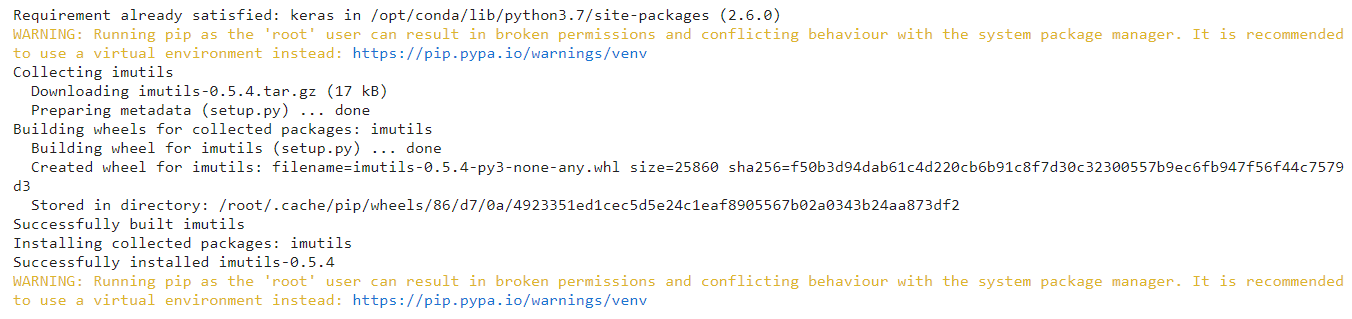

In [2]:
TRAINING_DIR = "../input/cat-and-dog/training_set/training_set"
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(TRAINING_DIR, 
                                                    batch_size=10, 
                                                    target_size=(150, 150))
VALIDATION_DIR = "../input/cat-and-dog/test_set/test_set"
validation_datagen = ImageDataGenerator(rescale=1.0/255)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR, 
                                                         batch_size=10, 
                                                         target_size=(150, 150))

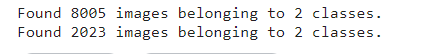

In [3]:
#work on progress
TRAIN_DIR = '../input/cat-and-dog/training_set/training_set'
VALID_DIR = '../input/cat-and-dog/test_set/test_set'
TEST_DIR = '../input/cat-and-dog/test_set/test_set'
class_names = []
class_count = []
TRAIN_EXAMPLES = 0
for folder in  os.listdir(TRAIN_DIR) : 
    files = gb.glob(pathname= str( TRAIN_DIR + '//' + folder + '/*.jpg'))
    class_names.append(folder)
    class_count.append(len(files))
    TRAIN_EXAMPLES += len(files)
    
sns.barplot(x = class_names, y=class_count).set_title("Distribution across classes in training set")
plt.show()

print(f'Total Train Examples = {TRAIN_EXAMPLES}')

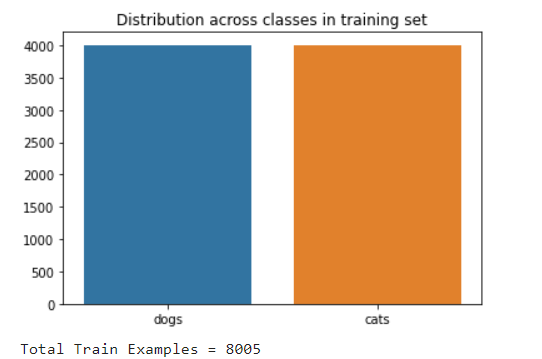

In [4]:
class_names = []
class_count = []
VALIDATION_EXAMPLES = 0
for folder in  os.listdir(VALID_DIR) : 
    files = gb.glob(pathname= str( VALID_DIR + '//' + folder + '/*.jpg'))
    class_names.append(folder)
    class_count.append(len(files))
    VALIDATION_EXAMPLES += len(files)
    
sns.barplot(x = class_names, y=class_count).set_title("Distribution across classes in training set")
plt.show()

print(f'Total Train Examples = {VALIDATION_EXAMPLES}')


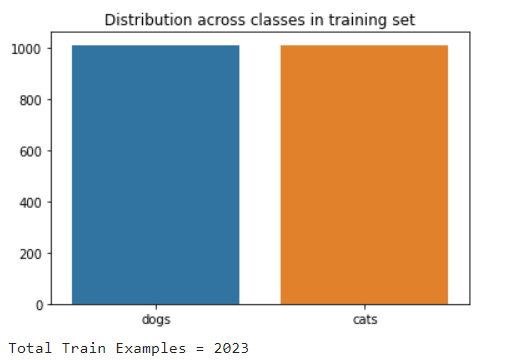

In [5]:
# diaplay 5 images from each class
plt.figure(figsize=(12,12))
i=0
for c in os.listdir(TRAIN_DIR):  
    path = os.path.join(TRAIN_DIR,c)
    for img in os.listdir(path):
        img_array = cv2.cvtColor(cv2.imread(os.path.join(path,img)), cv2.COLOR_BGR2RGB) 
        plt.subplot(2,5,i+1)
        plt.imshow(img_array)
        if i%5 == 0:
            plt.ylabel(c)
        plt.xticks([])
        plt.yticks([])
        i += 1
        if i%5 == 0:
            break

plt.tight_layout()        
plt.show() 
 

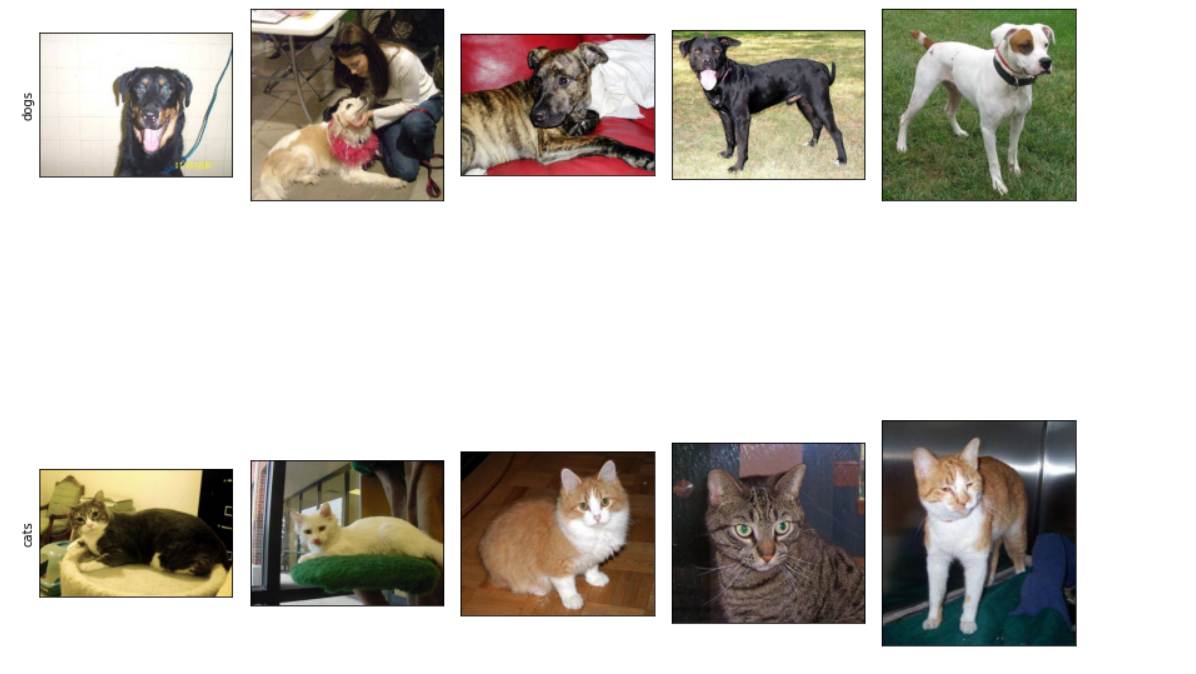

In [6]:
CATEGORIES = ['cats','dogs']

IMG_SIZE = 150
train_data = []

for c in CATEGORIES:
    path = os.path.join(TRAINING_DIR, c)
    class_num = CATEGORIES.index(c)

    for img in  tqdm(os.listdir(path)):
        try:
            img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_COLOR)
            img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            train_data.append([img_resized, class_num])
        except Exception as e:
            pass

print(len(train_data))

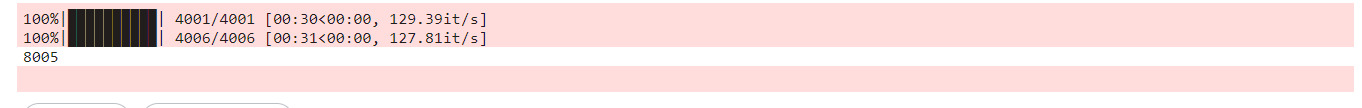

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_data[i][0])
    plt.xlabel(CATEGORIES[train_data[i][1]])
plt.show()

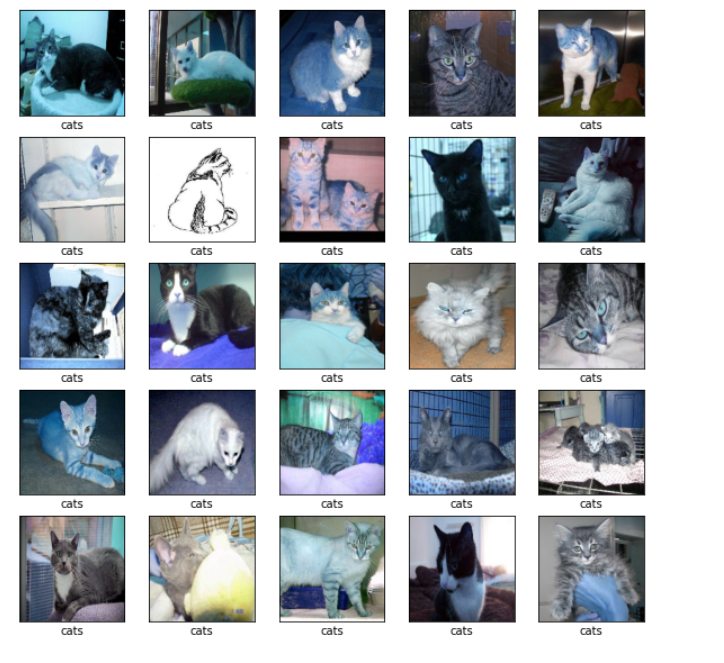

In [8]:
input_shape=(150,150,3)

In [9]:
model=Sequential()

model.add(Conv2D(32,kernel_size=3,input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(2))

model.add(Conv2D(64,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPooling2D(2))

model.add(Conv2D(128,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPooling2D(2))

model.add(Conv2D(256,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPooling2D(2))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(2,activation='softmax'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
model.summary()

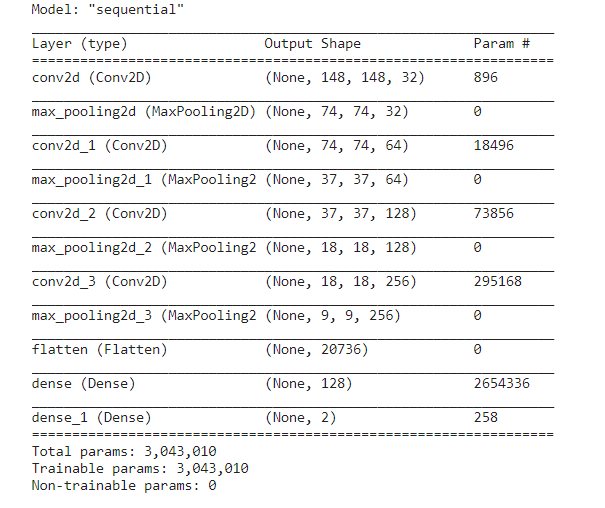

In [10]:
try:
    history = model.fit_generator(train_generator,
                                  epochs=100,
                                  validation_data=validation_generator)
except Exception as e:
    print(e)

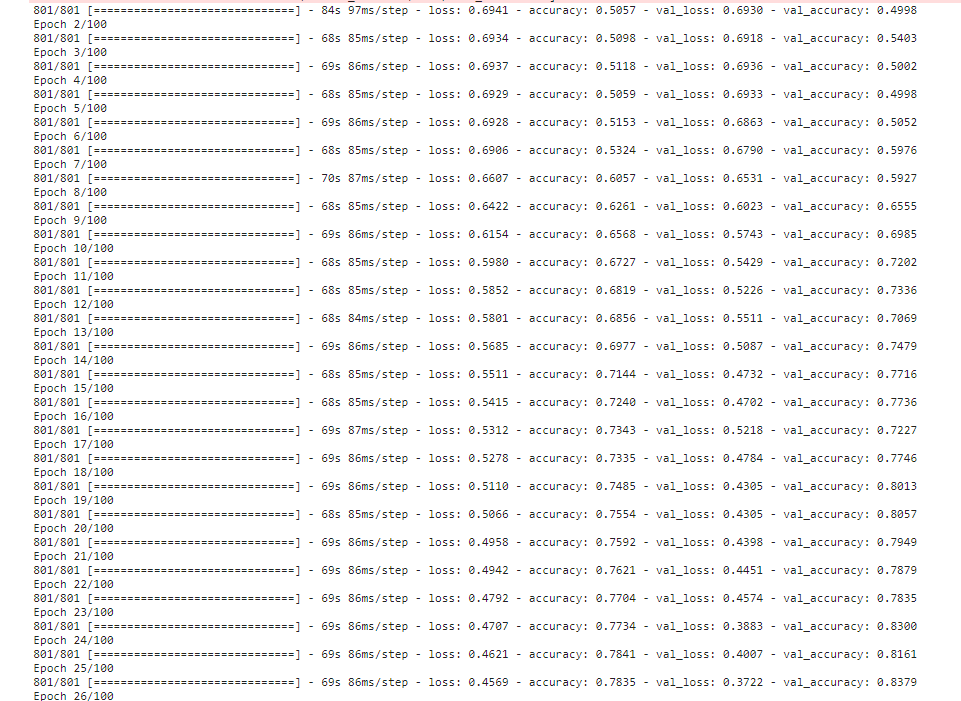
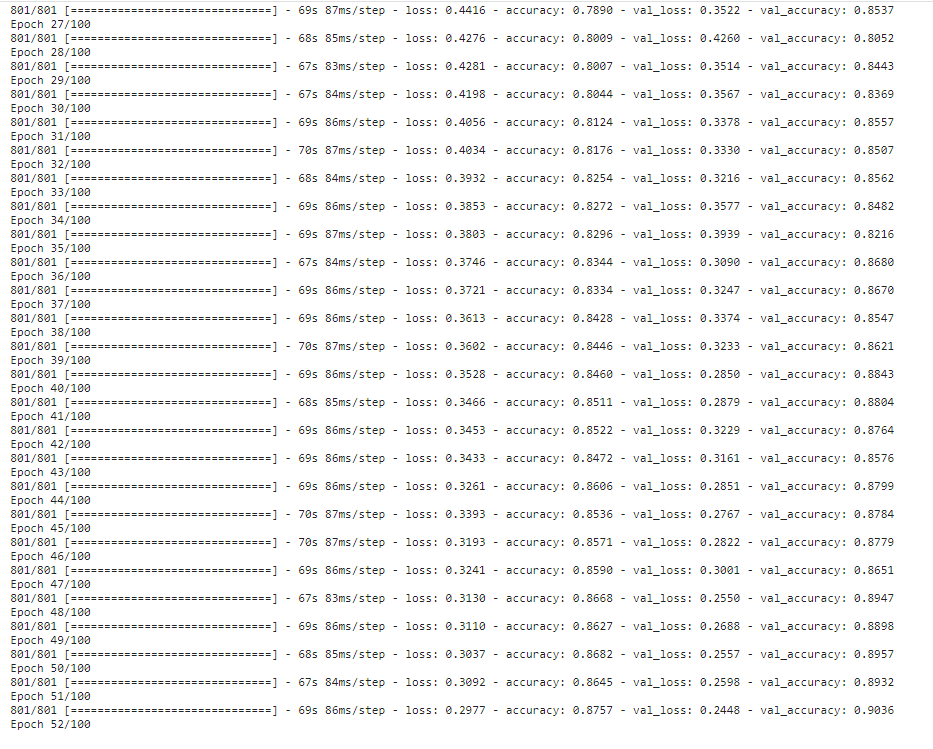
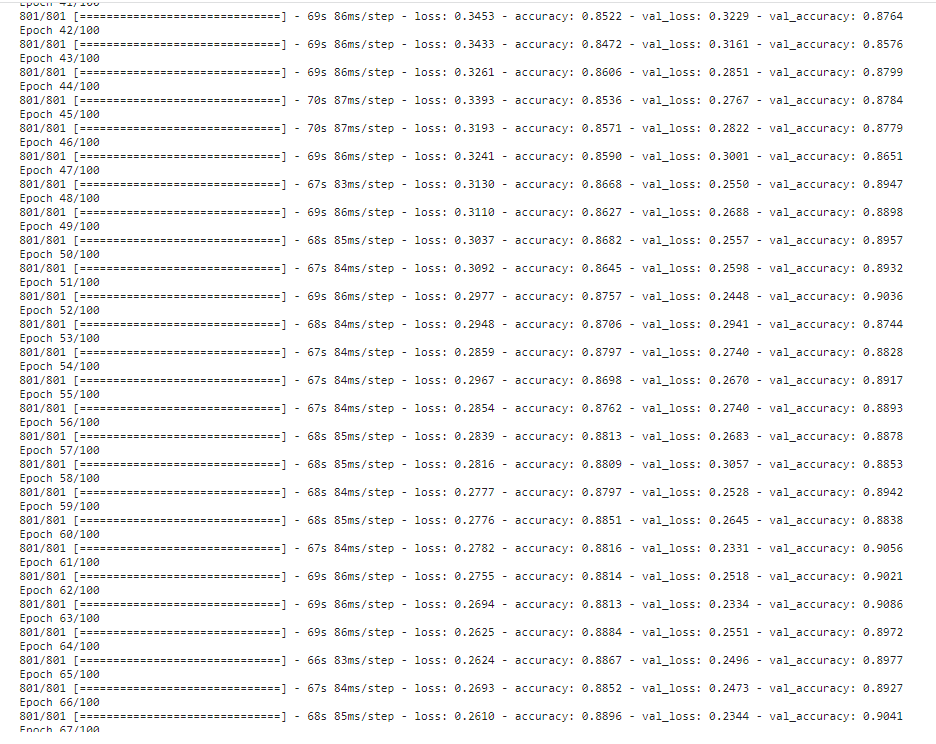
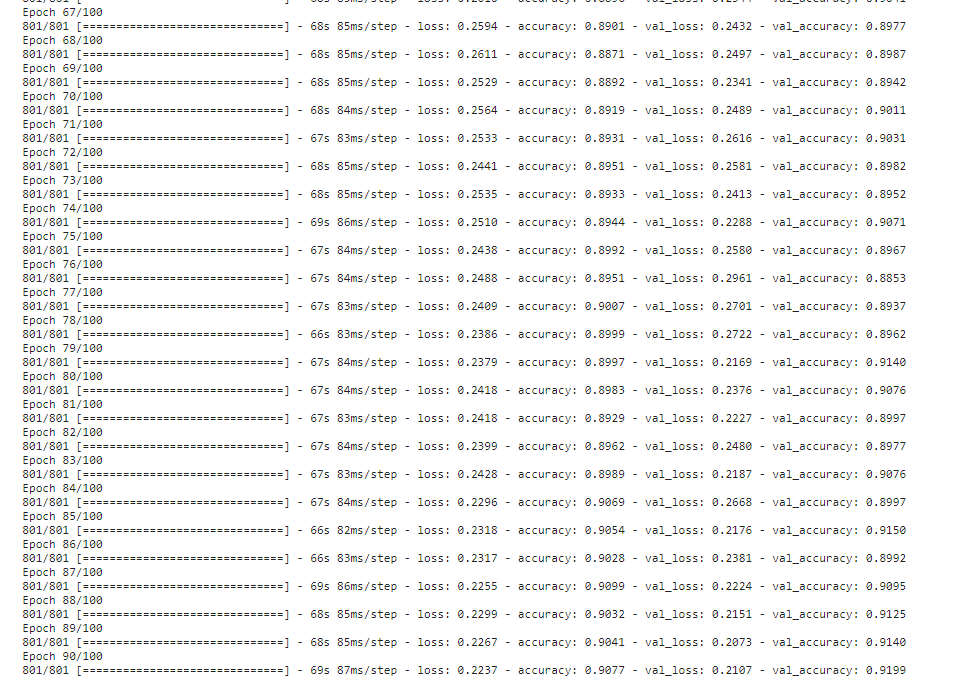
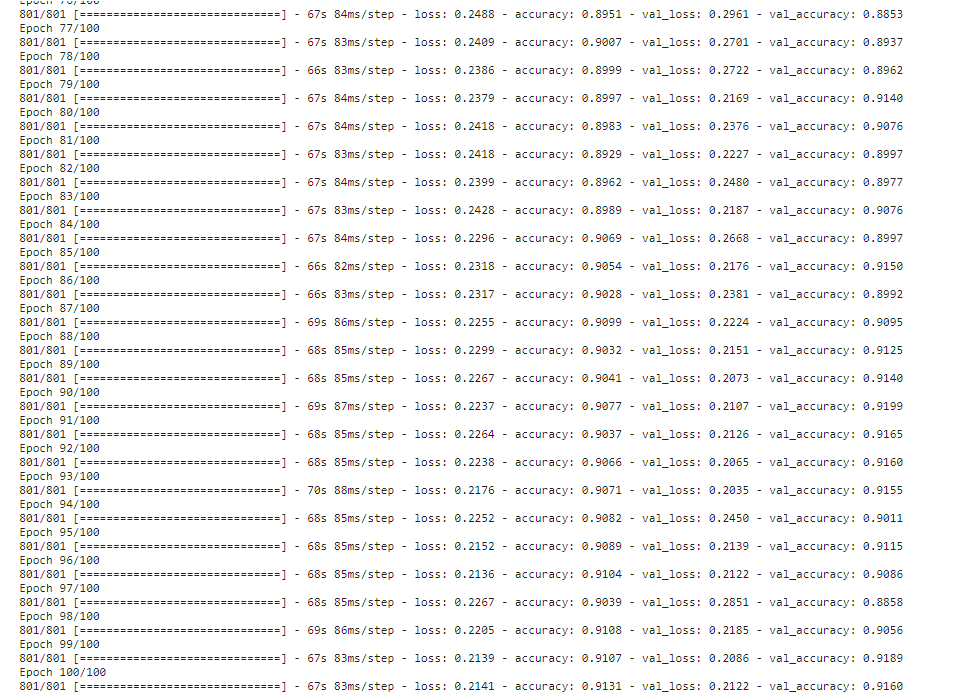

In [11]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], '--', label='train accuracy')
plt.plot(history.history['val_accuracy'], '--', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], '--', label='train loss')
plt.plot(history.history['val_loss'], '--', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

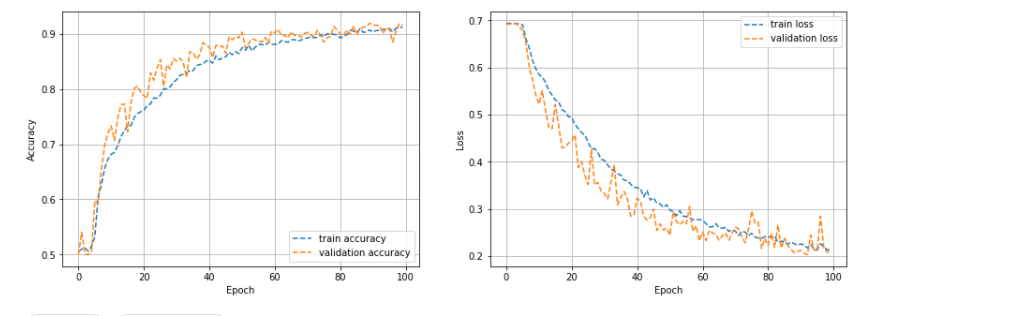

In [13]:
accuracy = history.history['accuracy']
val_accuracy  = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']